In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

%matplotlib inline

### Get Housing Data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


We only take the number of rooms as our feature and the median value as our target

In [3]:
X = df[['RM']].values
y = df['MEDV'].values

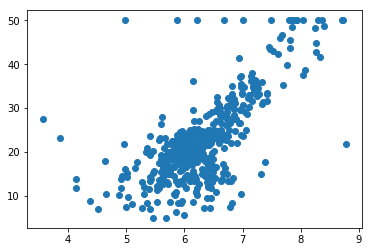

In [4]:
plt.scatter(X, y);

We scale the feature and target which helps with convergence etc.

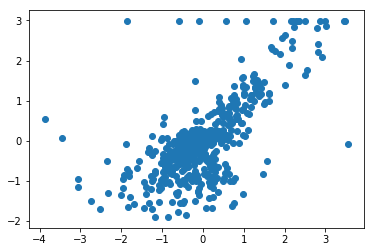

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
plt.scatter(X_std, y_std);

As a check, we run LR through scikit-learn:

In [6]:
from sklearn.linear_model import LinearRegression
X_train = X_std
y_train = y_std
sk_lr = LinearRegression()
sk_lr.fit(X_train, y_train)
loss = np.mean(np.square(y_train - sk_lr.predict(X_train)))
print('Cost\t {:.6f}'.format(loss))
print('w_0\t {:.10f}'.format(sk_lr.intercept_))
print('w_1\t {:.6f}'.format(sk_lr.coef_[0]))

Cost	 0.516475
w_0	 -0.0000000000
w_1	 0.695360


#### Gradient Descent


First we implement LR with Gradient Descent (GD) in numpy

In [7]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):

        n, m = X.shape 
        
        # add bias unit
        b = np.ones(n)
        self.w_ = np.zeros(1 + m)
        self.cost_ = []

        for i in range(self.epochs):

            output = self.net_input(X)
            
            loss = (y - output)
            cost = np.mean(np.square(loss)) #/ (2.0)
            
            print("Iteration %d | Cost: %f" % (i, cost))
            # update weights
            self.w_[1:] += self.eta * np.dot(X.T, loss)
            self.w_[0] += self.eta * np.dot(b.T, loss)
            
            self.cost_.append(cost)

        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [8]:
n_iter = 15
eta=0.001
lr_gd = LinearRegressionGD(eta, n_iter)
lr_gd.train(X_train, y_train);

Iteration 0 | Cost: 1.000000
Iteration 1 | Cost: 0.634472
Iteration 2 | Cost: 0.545270
Iteration 3 | Cost: 0.523502
Iteration 4 | Cost: 0.518189
Iteration 5 | Cost: 0.516893
Iteration 6 | Cost: 0.516577
Iteration 7 | Cost: 0.516499
Iteration 8 | Cost: 0.516481
Iteration 9 | Cost: 0.516476
Iteration 10 | Cost: 0.516475
Iteration 11 | Cost: 0.516475
Iteration 12 | Cost: 0.516475
Iteration 13 | Cost: 0.516475
Iteration 14 | Cost: 0.516475


In [9]:
print('Cost\t{:.6f}'.format(np.min(lr_gd.cost_)))
[print('w_{:}\t{:.6f}'.format(i, w)) for i, w in enumerate(lr_gd.w_)];

Cost	0.516475
w_0	-0.000000
w_1	0.695342


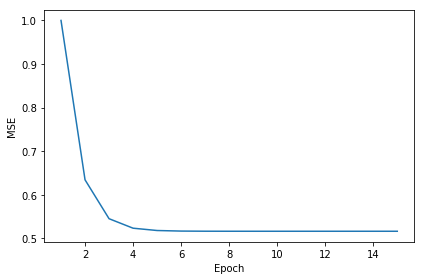

In [10]:
plt.plot(range(1, lr_gd.epochs+1), lr_gd.cost_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

#### Stochastic Gradient Descent


Then we implement the same using Stochastic Gradient Descent (SGD) in numpy:

In [11]:
class LinearRegressionSGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y, reinitialize_weights=True):

        n, m = X.shape
        
        if reinitialize_weights:
            self.w_ = np.zeros(1 + m)

        self.cost_ = []

        for i in range(self.epochs):
            X, y = shuffle(X, y)

            for xi, target in zip(X, y):

                output = self.net_input(xi)
                loss = (target - output)
                upd = self.eta * xi.dot(loss)
                self.w_[1:] += upd
                self.w_[0] += self.eta * loss
            
            cost = np.mean(np.square(y - self.activation(X)))
            print("Iteration %d | Cost: %f" % (i, cost))
            self.cost_.append(cost)

        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return self.net_input(X)

In [12]:
n_iter = 15
eta=0.001

lr_sgd = LinearRegressionSGD(eta, n_iter)
lr_sgd.train(X_train, y_train);

Iteration 0 | Cost: 0.696309
Iteration 1 | Cost: 0.580622
Iteration 2 | Cost: 0.539482
Iteration 3 | Cost: 0.526387
Iteration 4 | Cost: 0.520237
Iteration 5 | Cost: 0.517520
Iteration 6 | Cost: 0.516882
Iteration 7 | Cost: 0.516725
Iteration 8 | Cost: 0.516482
Iteration 9 | Cost: 0.516493
Iteration 10 | Cost: 0.516498
Iteration 11 | Cost: 0.516539
Iteration 12 | Cost: 0.516530
Iteration 13 | Cost: 0.516498
Iteration 14 | Cost: 0.516490


In [13]:
print('Cost\t{:.6f}'.format(np.min(lr_sgd.cost_)))
[print('w_{:}\t{:.6f}'.format(i, w)) for i, w in enumerate(lr_sgd.w_)];

Cost	0.516482
w_0	-0.003858
w_1	0.694953


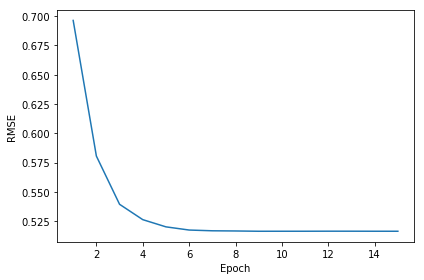

In [14]:
plt.plot(range(1, lr_sgd.epochs+1), lr_sgd.cost_)
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [15]:
y_hat = lr_gd.predict(X_train)

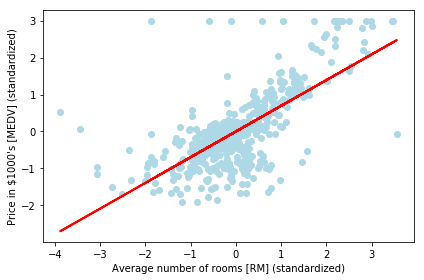

In [16]:
plt.scatter(X_train, y_train, c='lightblue')
plt.plot(X_train, y_hat, color='red', linewidth=2)   
# plt.plot(X_train, y_hat_sk, color='blue', linewidth=2)   
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_train, y_hat)

0.483525455677841